In [1]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import altair as alt
from IPython.display import display

In [2]:
# loading data
preds = np.load("./30_examples/results/preds.np")
label = np.load("./30_examples/results/label.np")

print(preds)
print(label)

[[-6.11185325e-10  1.98890291e-08 -2.37362455e-18 ...  8.44796108e-12
   1.36664009e-13  1.43867169e-07]
 [ 1.26525457e-10  1.94743990e-08 -2.56366846e-18 ...  8.28894592e-12
   1.02102354e-13  1.36709559e-07]
 [-8.18929369e-10  2.00230090e-08 -2.25321435e-18 ...  5.60566524e-12
   1.44687973e-13  1.36979111e-07]
 ...
 [-7.63598074e-10  2.07745927e-08 -2.29507713e-18 ...  8.05512948e-12
   1.48320158e-13  1.51830818e-07]
 [ 1.86211047e-10  1.99601686e-08 -2.61699018e-18 ...  8.07780579e-12
   1.02450492e-13  1.15412035e-07]
 [-6.31614760e-10  2.05317718e-08 -2.28370836e-18 ...  6.57212826e-12
   1.41012310e-13  1.53431301e-07]]
['1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5' '5']


In [3]:
# reducting dimensions

def reduce_dim(perplexity):
    preds_reduced = TSNE(n_components=2, perplexity = perplexity).fit_transform(preds)
    return preds_reduced


def create_plot(preds_reduced, label):
    plot_df = pd.DataFrame({'X':preds_reduced[:,0],'Y':preds_reduced[:,1], 'label': label})

    #plot_df["count"] = plot_df.apply(lambda row: len(plot_df[plot_df["label"] == row["label"]]), axis=1)
    #plot_df = plot_df[plot_df["count"] > 45]

    chart = alt.Chart(plot_df).mark_circle(size=60).encode(
        x='X',
        y='Y',
        color='label').interactive()
    
    display(chart)

Perplexity 5


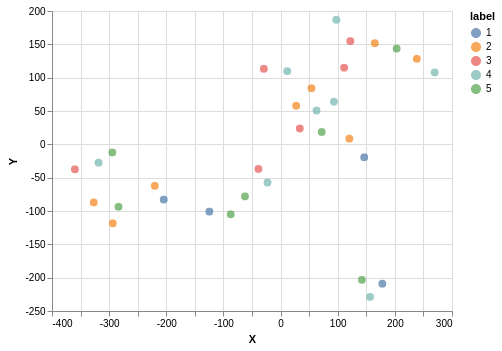

Perplexity 15


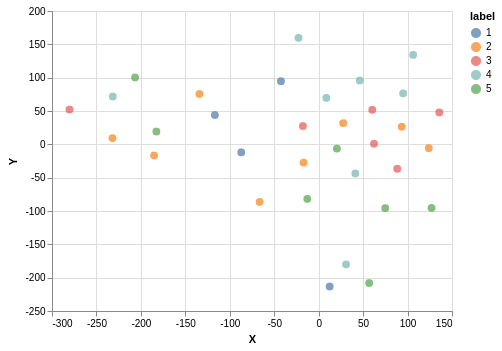

Perplexity 30


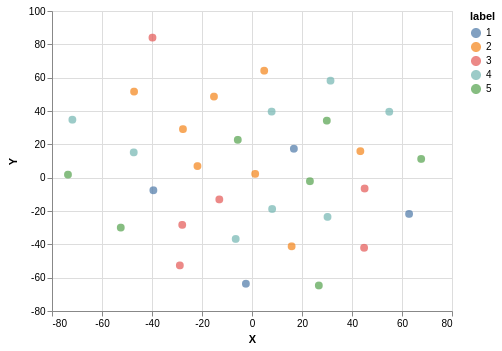

Perplexity 35


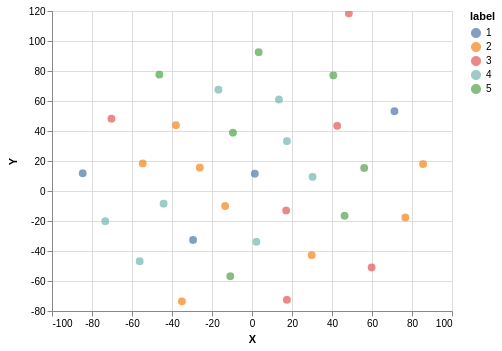

Perplexity 40


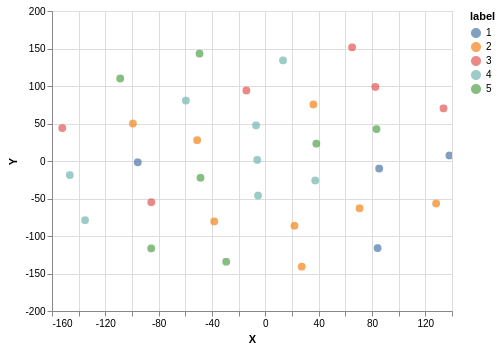

Perplexity 45


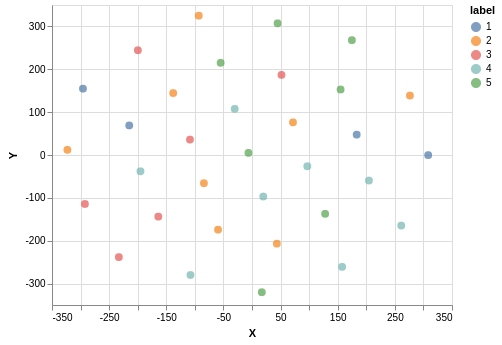

Perplexity 50


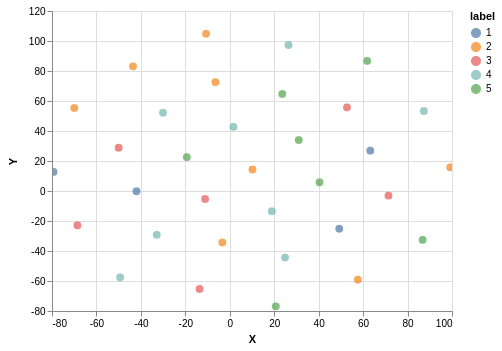

Perplexity 60


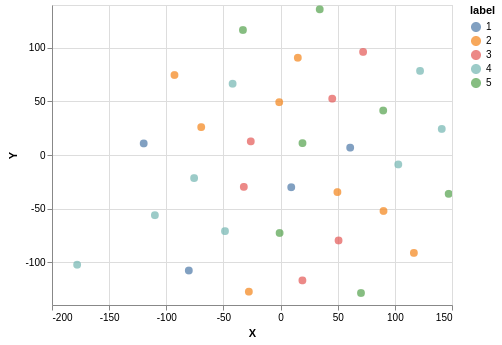

In [4]:
perplexity = [5, 15, 30, 35, 40, 45, 50, 60]

for p in perplexity:
    print("Perplexity {}".format(p))
    r = reduce_dim(p)
    create_plot(r, label)

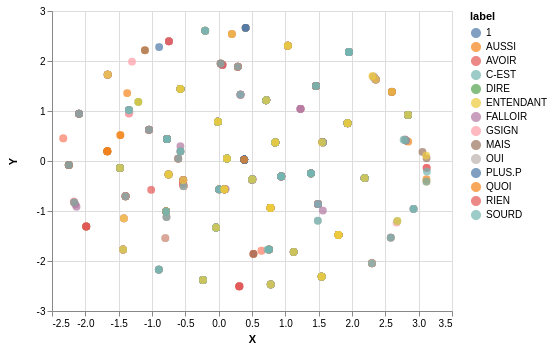

In [5]:
# standalone graph

preds_reduced = TSNE(n_components=2, perplexity = 80).fit_transform(preds)


plot_df = pd.DataFrame({'X':preds_reduced[:,0],'Y':preds_reduced[:,1], 'label': label})

plot_df = plot_df[plot_df["label"] != 'LS']
plot_df["count"] = plot_df.apply(lambda row: len(plot_df[plot_df["label"] == row["label"]]), axis=1)
plot_df = plot_df[plot_df["count"] > 45]

chart = alt.Chart(plot_df).mark_circle(size=60).encode(
    x='X',
    y='Y',
    color='label').interactive()
    
display(chart)